In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.plotly as py
import cufflinks as cf
cf.go_offline()

In [2]:
df = pd.read_csv('clusters.csv')
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   cdm   rdm  \
0        170         72   Argentina         FC Barcelona  ...  66+2  66+2   
1        187         83    Portugal             Juventus  ...  61+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...  61+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...   NaN   NaN   
4        175         74     Belgium          Real Madrid  ...  63+3  63+3   

    rwb    lb   lcb    cb   rcb    rb  cluster cluster_name  
0  68+2  63+2  52+2  52+2  52+2  63+2        3      Forward  
1  65+3  61+3  53+3  53+3  53+3  61+3        3      Forward  
2  66+3  61+3  46+3  46+3  46+3  61+3        3      Forward  
3   NaN   NaN   NaN   NaN   NaN   NaN        2   Goalkeeper  
4  66+3  61+3  49+3  49+3  49+3  61+3        3      Forward  

[5 rows x 106 columns]

## Boxplots 

In [3]:
# Choosing 3 features from each kind

feats = ['attacking_crossing', 'attacking_finishing', 'attacking_volleys', 
          'skill_dribbling', 'skill_long_passing', 'skill_ball_control', 
          'movement_sprint_speed', 'movement_agility', 'movement_reactions',
          'power_shot_power','power_stamina', 'power_strength', 
          'mentality_aggression', 'mentality_positioning', 'mentality_vision',  
          'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
          'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_reflexes']

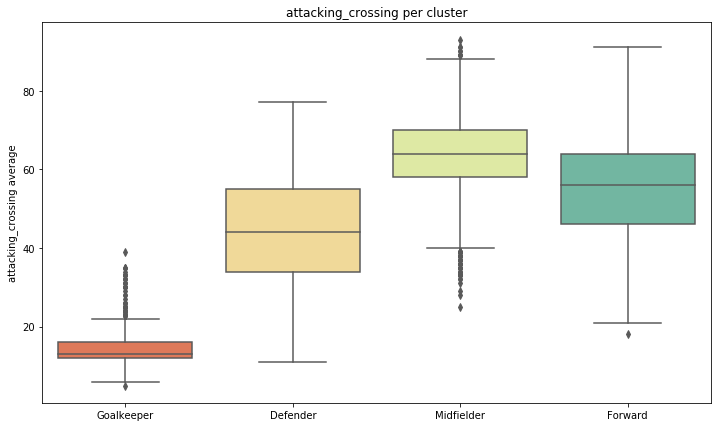

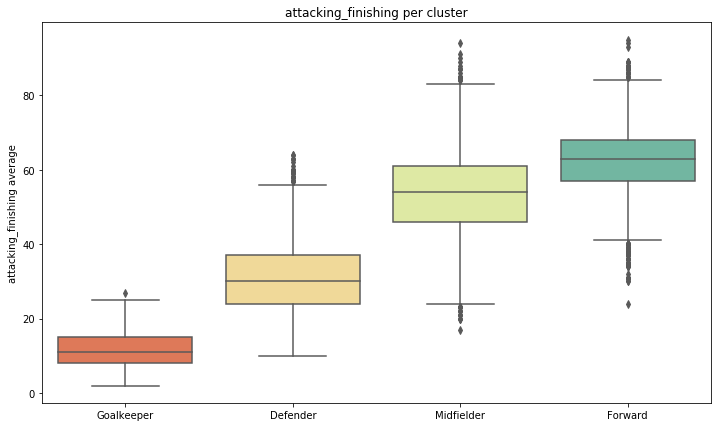

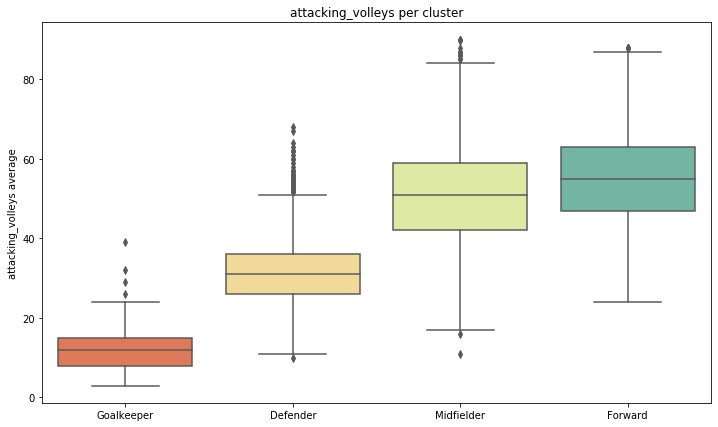

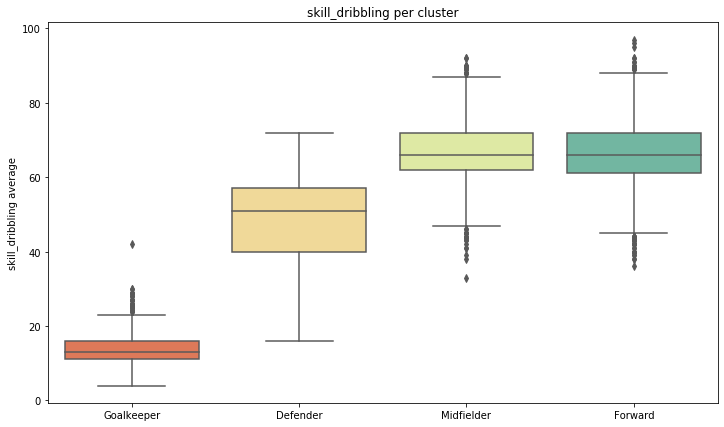

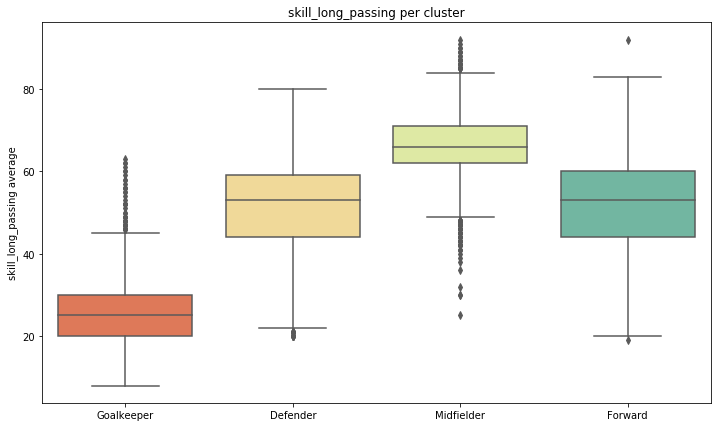

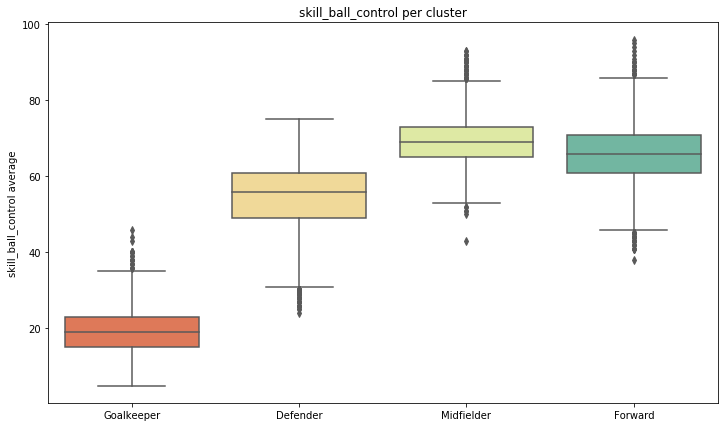

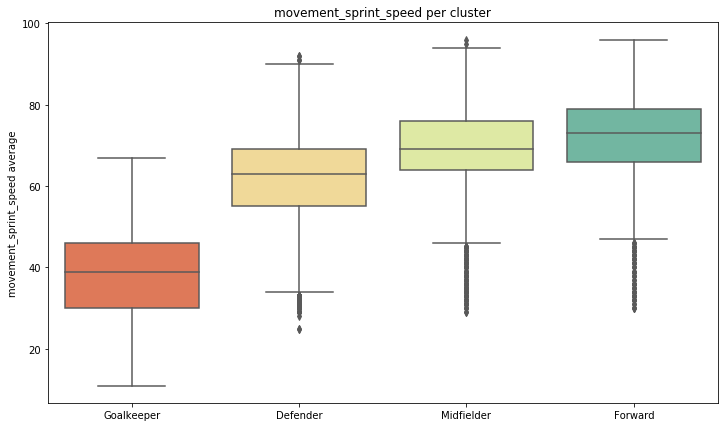

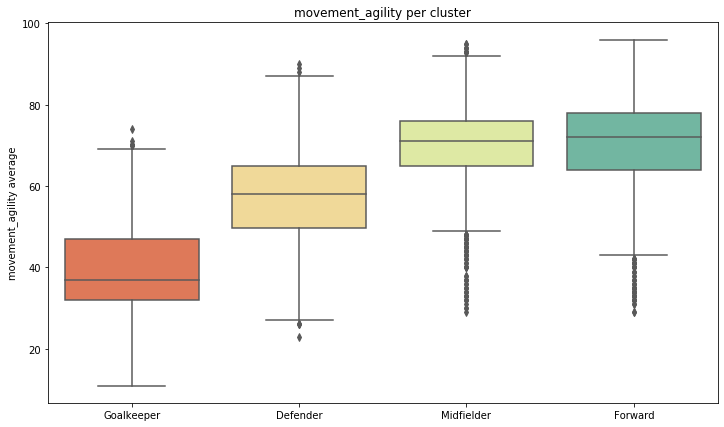

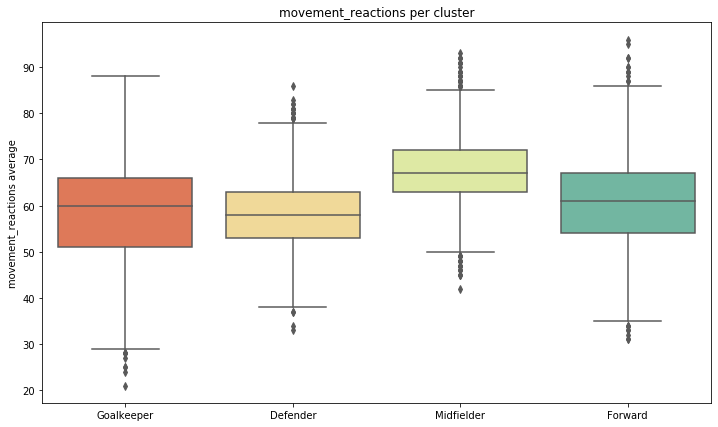

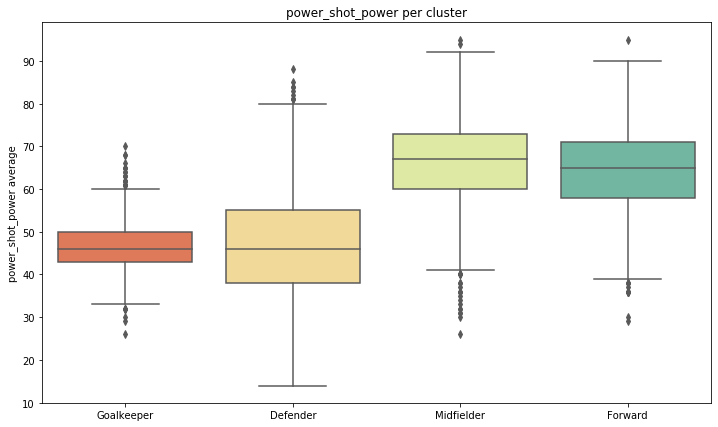

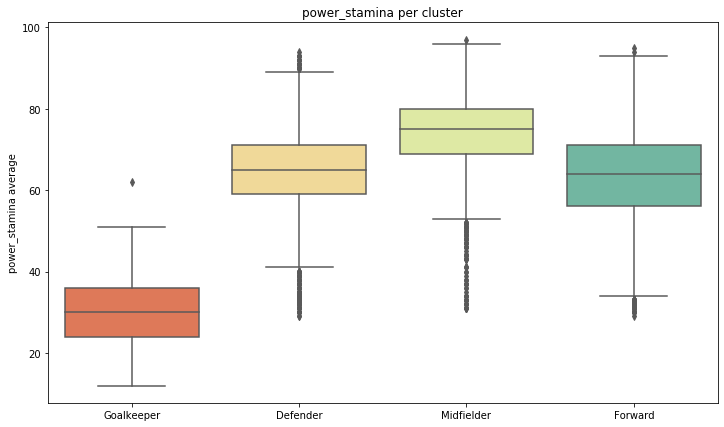

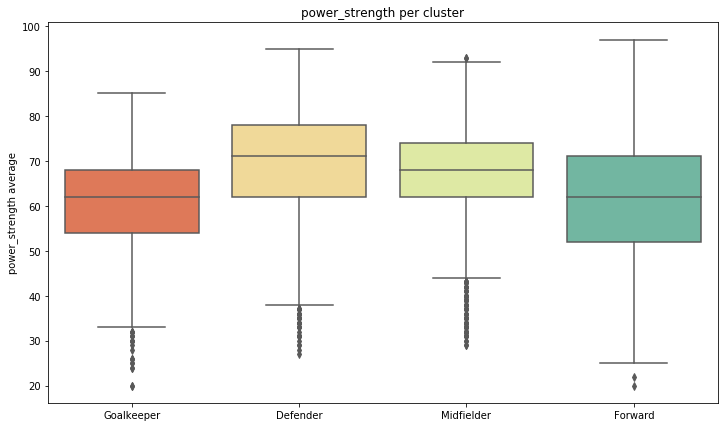

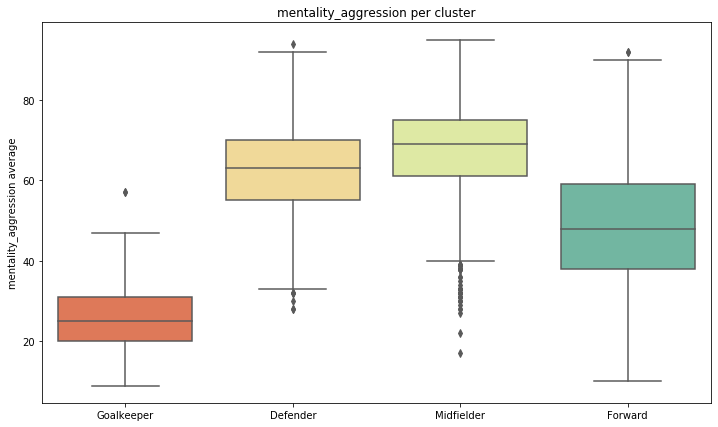

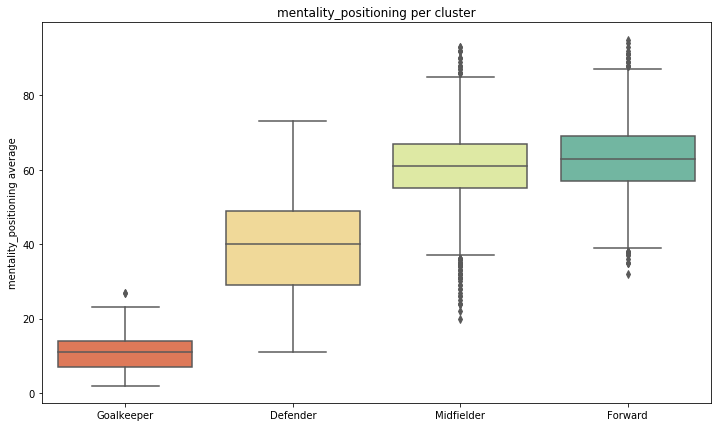

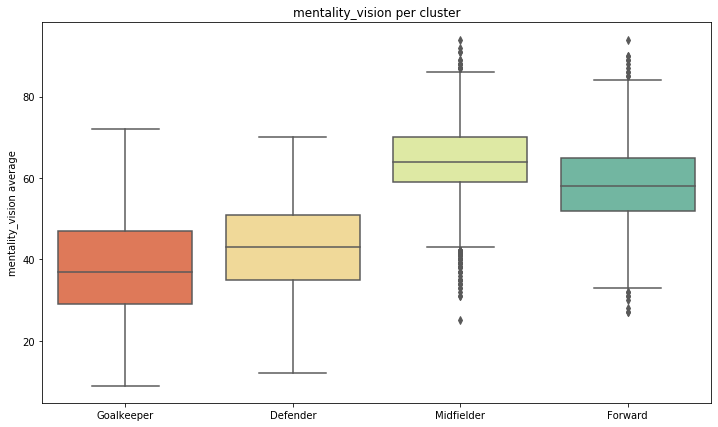

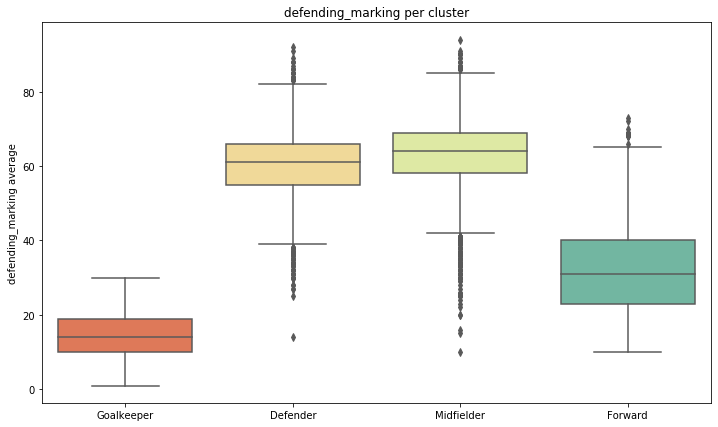

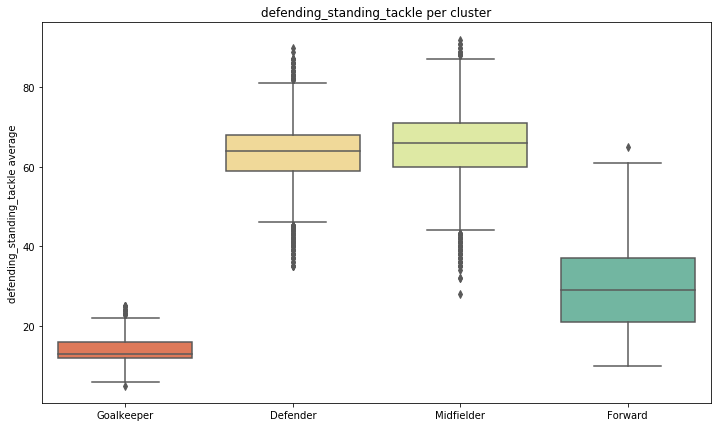

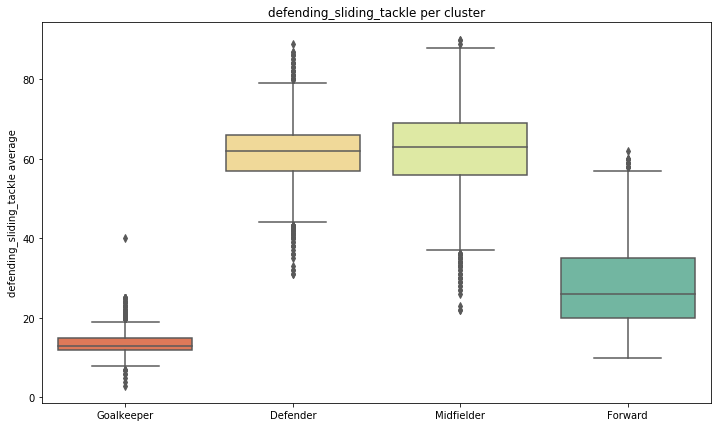

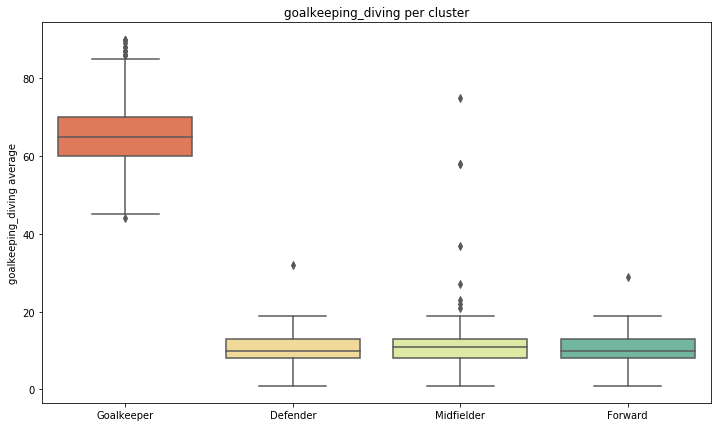

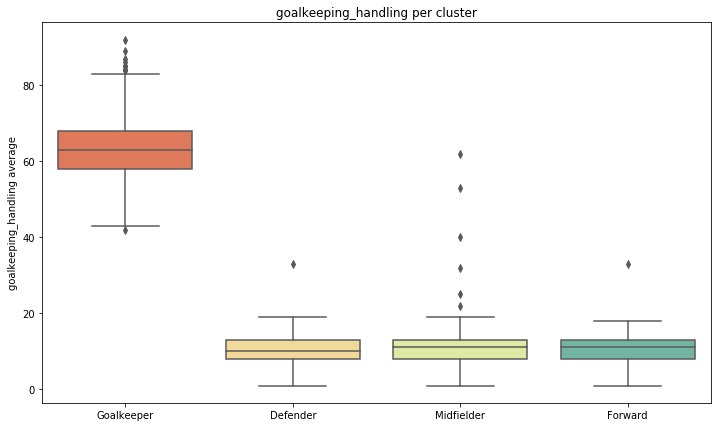

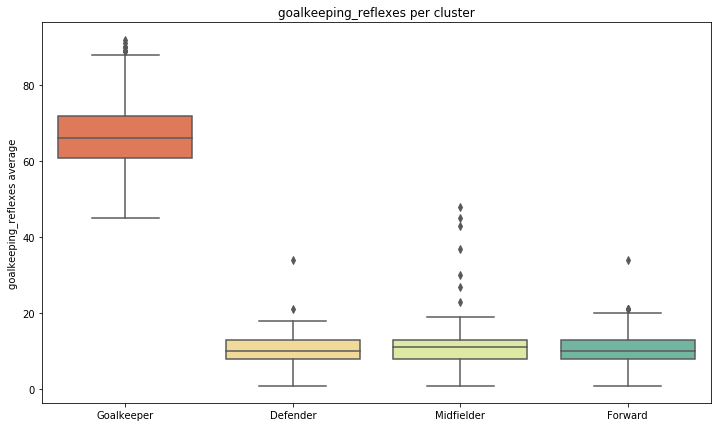

In [4]:
for feat in feats:
    
    plt.figure(figsize=(12,7))
    sns.boxplot(x='cluster_name', y=feat, data=df, palette='Spectral', 
                order=['Goalkeeper', 'Defender', 'Midfielder', 'Forward'])  
    plt.xlabel('')
    plt.ylabel('{} average'.format(feat))
    plt.title('{} per cluster'.format(feat))
    plt.show()

## Scatterplots

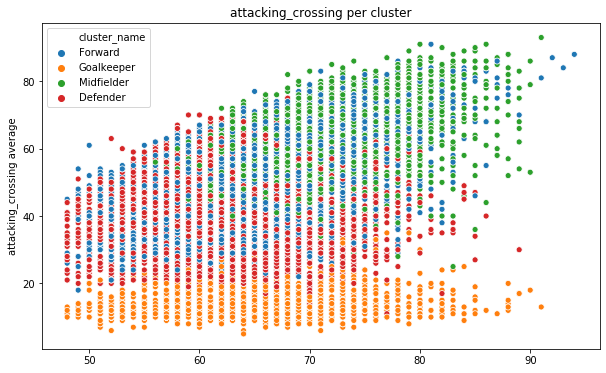

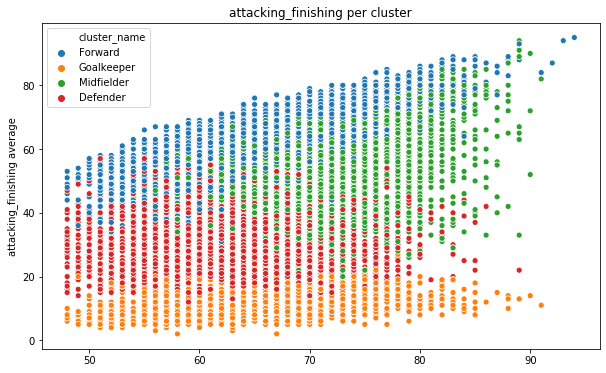

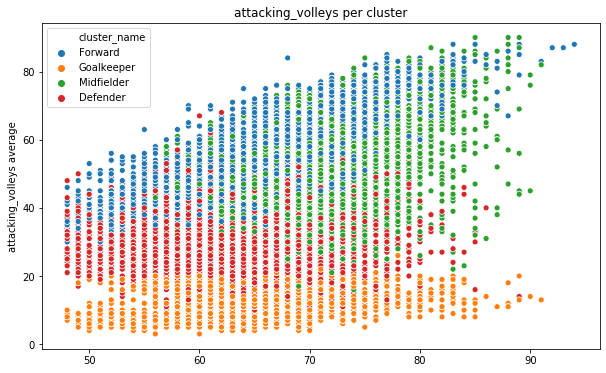

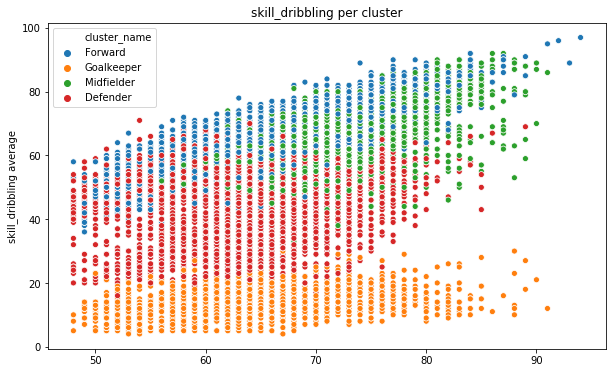

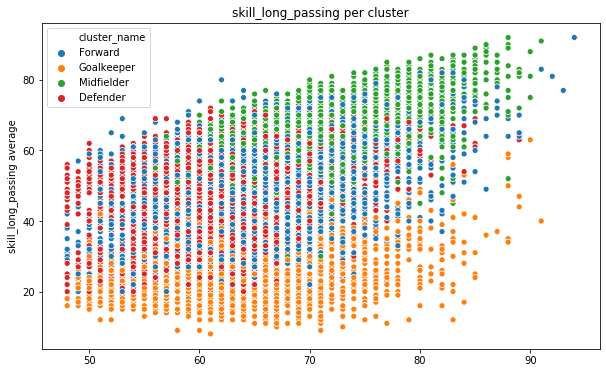

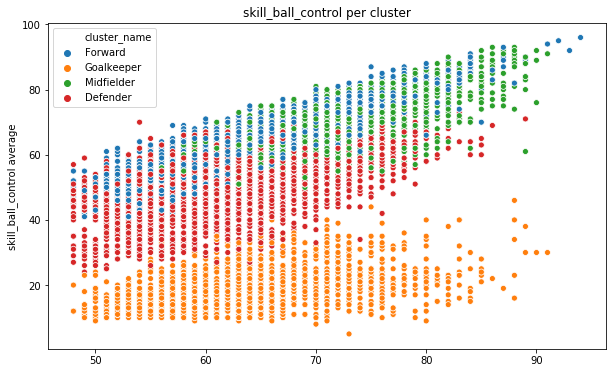

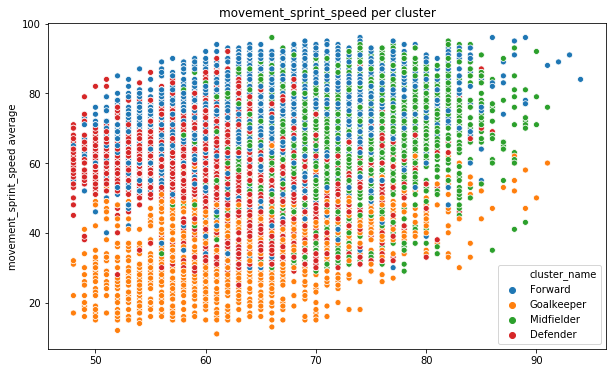

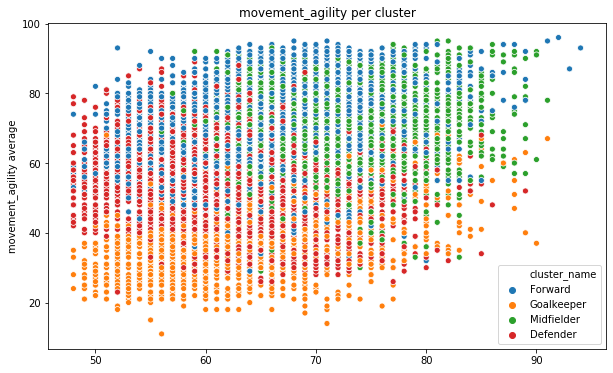

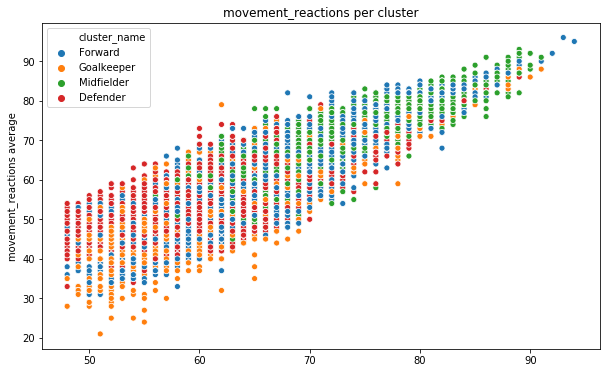

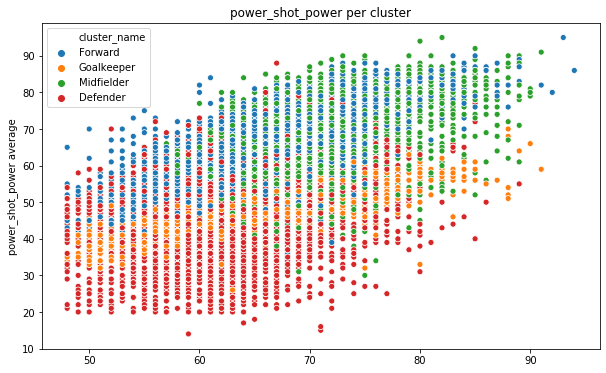

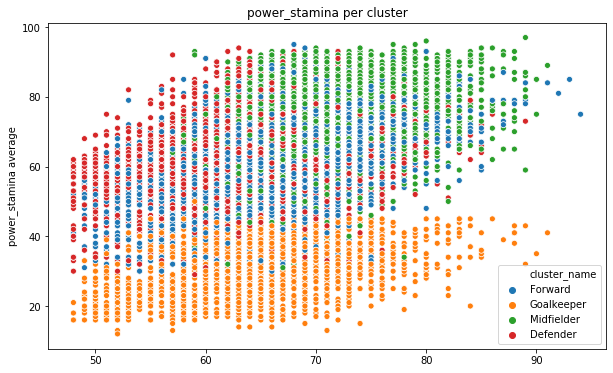

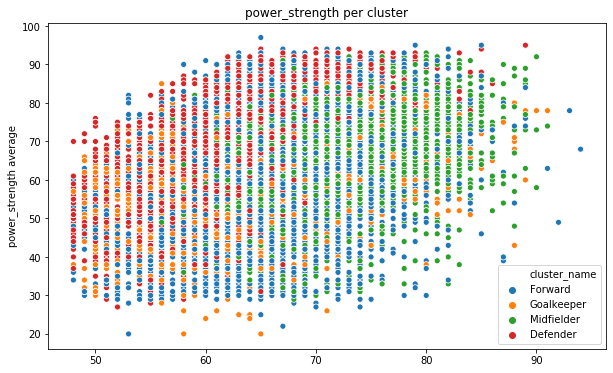

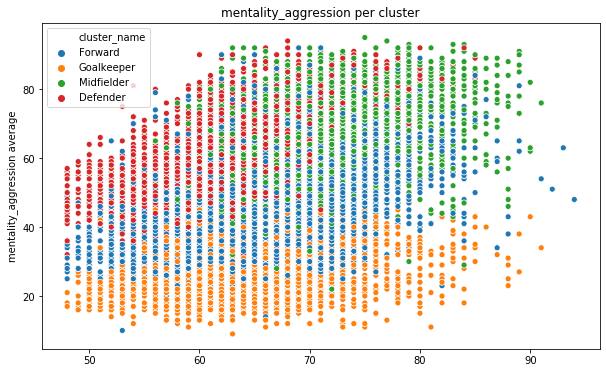

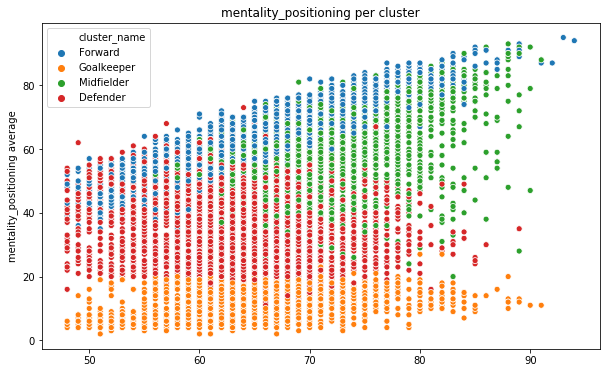

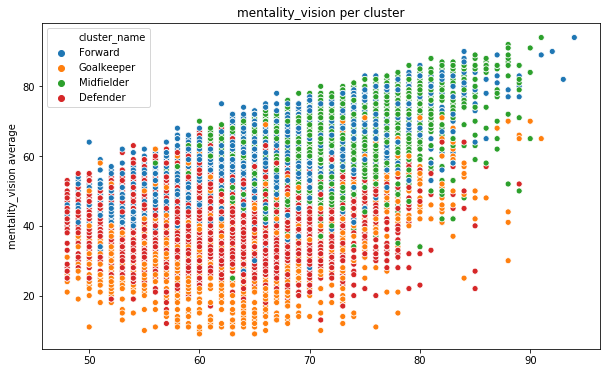

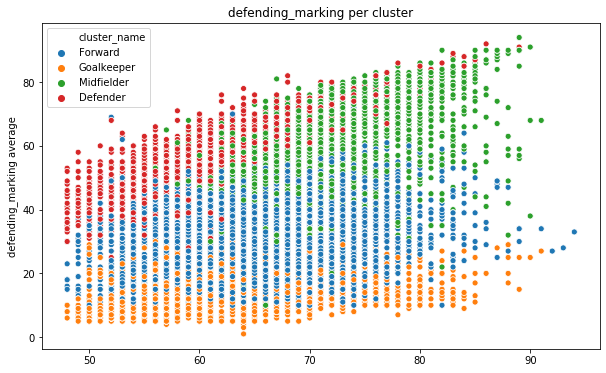

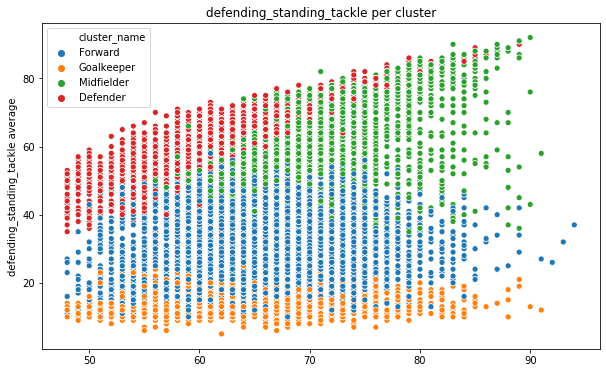

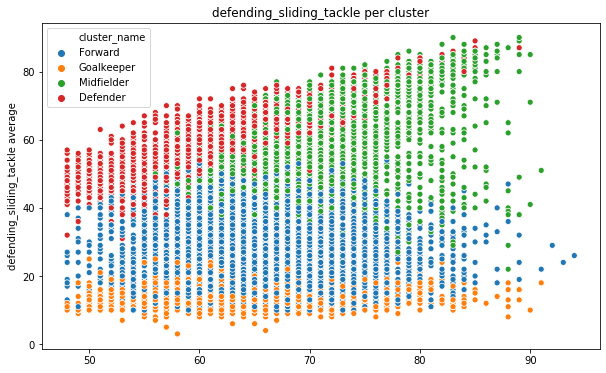

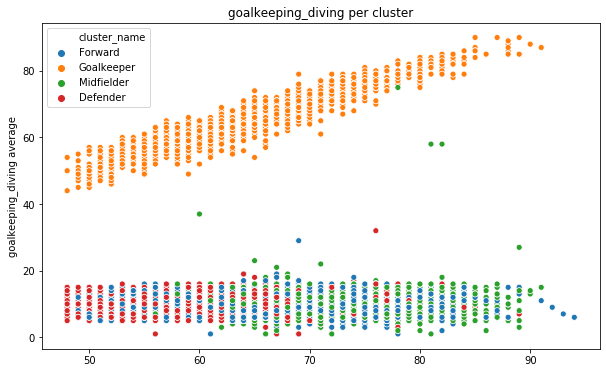

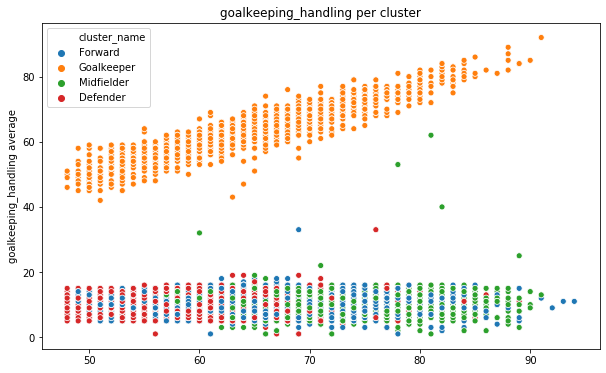

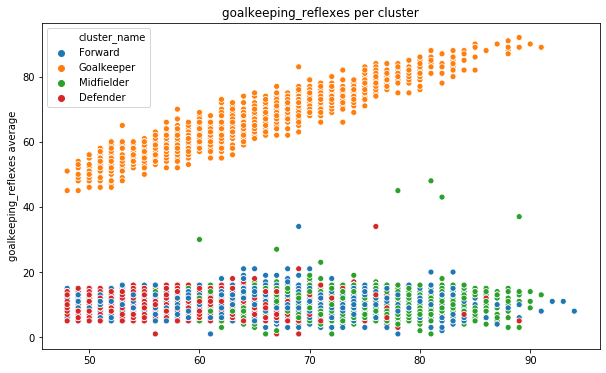

In [5]:
for feat in feats:
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=df, x='overall', y=feat, hue='cluster_name')
    plt.xlabel('')
    plt.ylabel('{} average'.format(feat))
    plt.title('{} per cluster'.format(feat))
    plt.show()

## Radar charts

In [6]:
radar_df = df.groupby('cluster', as_index=False).agg('mean')
radar_df

cluster      sofifa_id        age   height_cm  weight_kg    overall  \
0        0  226994.052233  24.299242  183.391348  76.609649  63.287480   
1        1  210526.227170  26.808531  179.391018  73.874859  70.219466   
2        2  213512.369352  26.266699  188.437623  81.960216  64.796660   
3        3  224026.597900  24.405318  178.975102  73.101965  65.674458   

   potential     value_eur      wage_eur  international_reputation  ...  \
0  69.920455  1.138510e+06   4761.562998                  1.030502  ...   
1  73.423901  4.177216e+06  15917.136415                  1.194664  ...   
2  70.089882  1.728016e+06   6667.976424                  1.088409  ...   
3  71.739160  2.361634e+06   8584.518970                  1.087568  ...   

   mentality_penalties  mentality_composure  defending_marking  \
0            40.262560            54.387360          60.290869   
1            55.013905            66.504885          62.808906   
2            19.545187            43.116405          14.694499   
3            59.250678            60.172425          32.130420   

   defending_standing_tackle  defending_sliding_tackle  goalkeeping_diving  \
0                  63.543062                 61.615431           10.360845   
1                  65.323750                 62.549981           10.594138   
2                  13.946464                 13.826130           65.422397   
3                  29.808604                 27.692073           10.393801   

   goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
0             10.400917            10.331738                10.354665   
1             10.613115            10.682262                10.682638   
2             63.146365            61.832515                63.374754   
3             10.452913            10.463076                10.391599   

   goalkeeping_reflexes  
0             10.359250  
1             10.652574  
2             66.390472  
3             10.433266  

[4 rows x 62 columns]

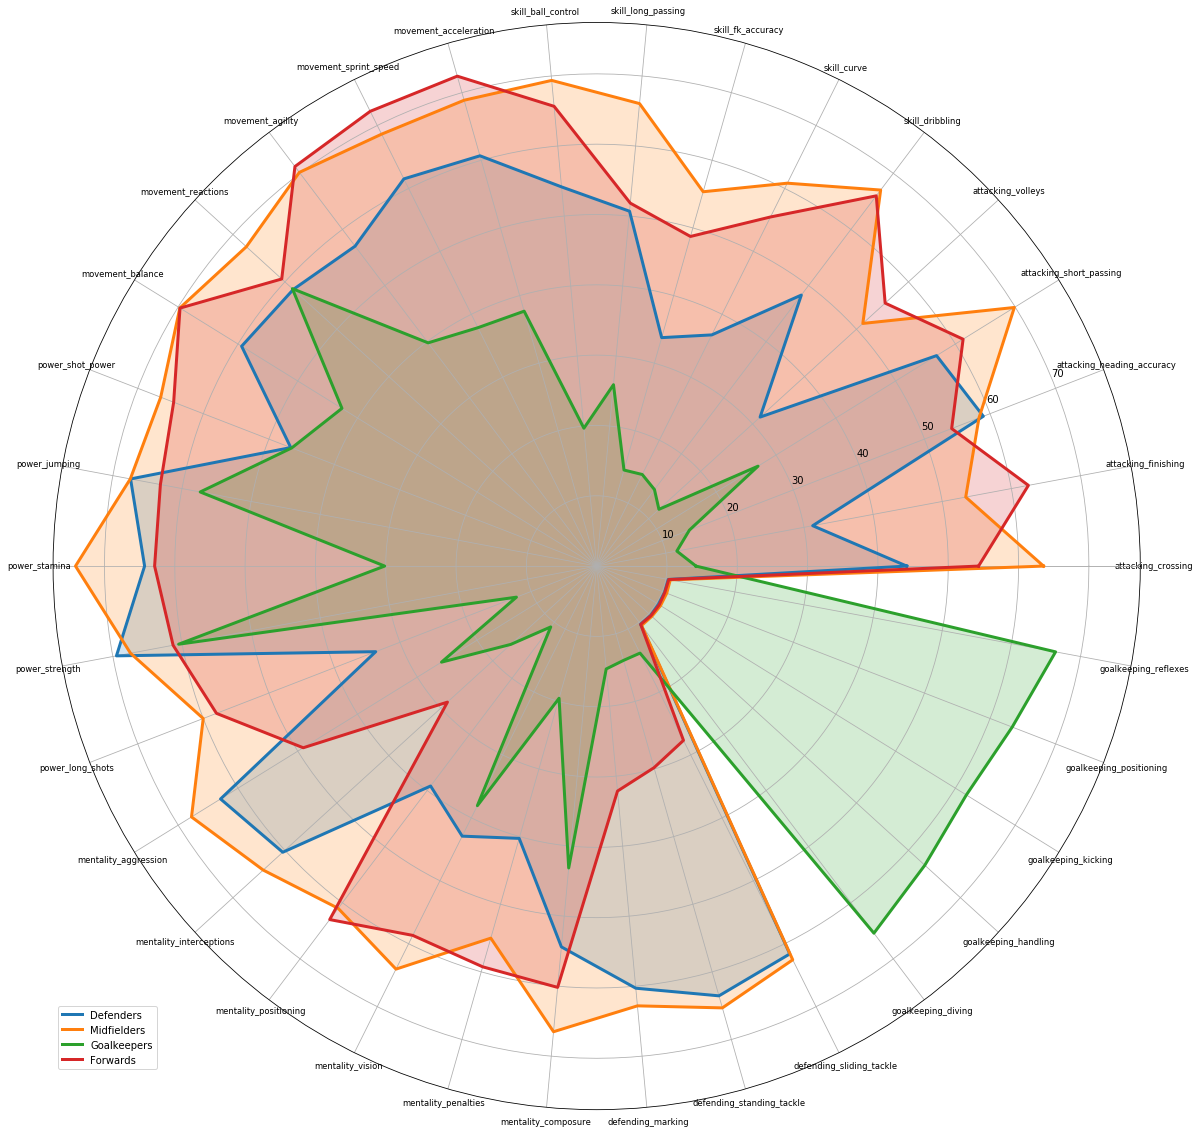

In [7]:
labels = ['attacking_crossing', 'attacking_finishing', 
           'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 
           'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
           'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power',
           'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
           'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
           'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
           'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 
           'goalkeeping_reflexes']

#Values and angles
stats0=radar_df.loc[0,labels].values
angles0=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats1=radar_df.loc[1,labels].values
angles1=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats2=radar_df.loc[2,labels].values
angles2=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats3=radar_df.loc[3,labels].values
angles3=np.linspace(0, 2*np.pi, len(labels), endpoint=False)


# close the plot
stats0=np.concatenate((stats0,[stats0[0]]))
angles0=np.concatenate((angles0,[angles0[0]]))

stats1=np.concatenate((stats1,[stats1[0]]))
angles1=np.concatenate((angles1,[angles1[0]]))

stats2=np.concatenate((stats2,[stats2[0]]))
angles2=np.concatenate((angles2,[angles2[0]]))

stats3=np.concatenate((stats3,[stats3[0]]))
angles3=np.concatenate((angles3,[angles3[0]]))



#Plot matrix
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles0, stats0, linewidth=3, label="Defenders")
ax.fill(angles0, stats0, alpha=0.2)

ax.plot(angles1, stats1, linewidth=3, label="Midfielders")
ax.fill(angles1, stats1, alpha=0.2)

ax.plot(angles2, stats2, linewidth=3, label="Goalkeepers")
ax.fill(angles2, stats2, alpha=0.2)

ax.plot(angles3, stats3, linewidth=3, label="Forwards")
ax.fill(angles3, stats3, alpha=0.2)


plt.legend(bbox_to_anchor=(0.1, 0.1))

ax.set_thetagrids(angles0 * 180/np.pi, labels, size='small')

ax.grid(True)


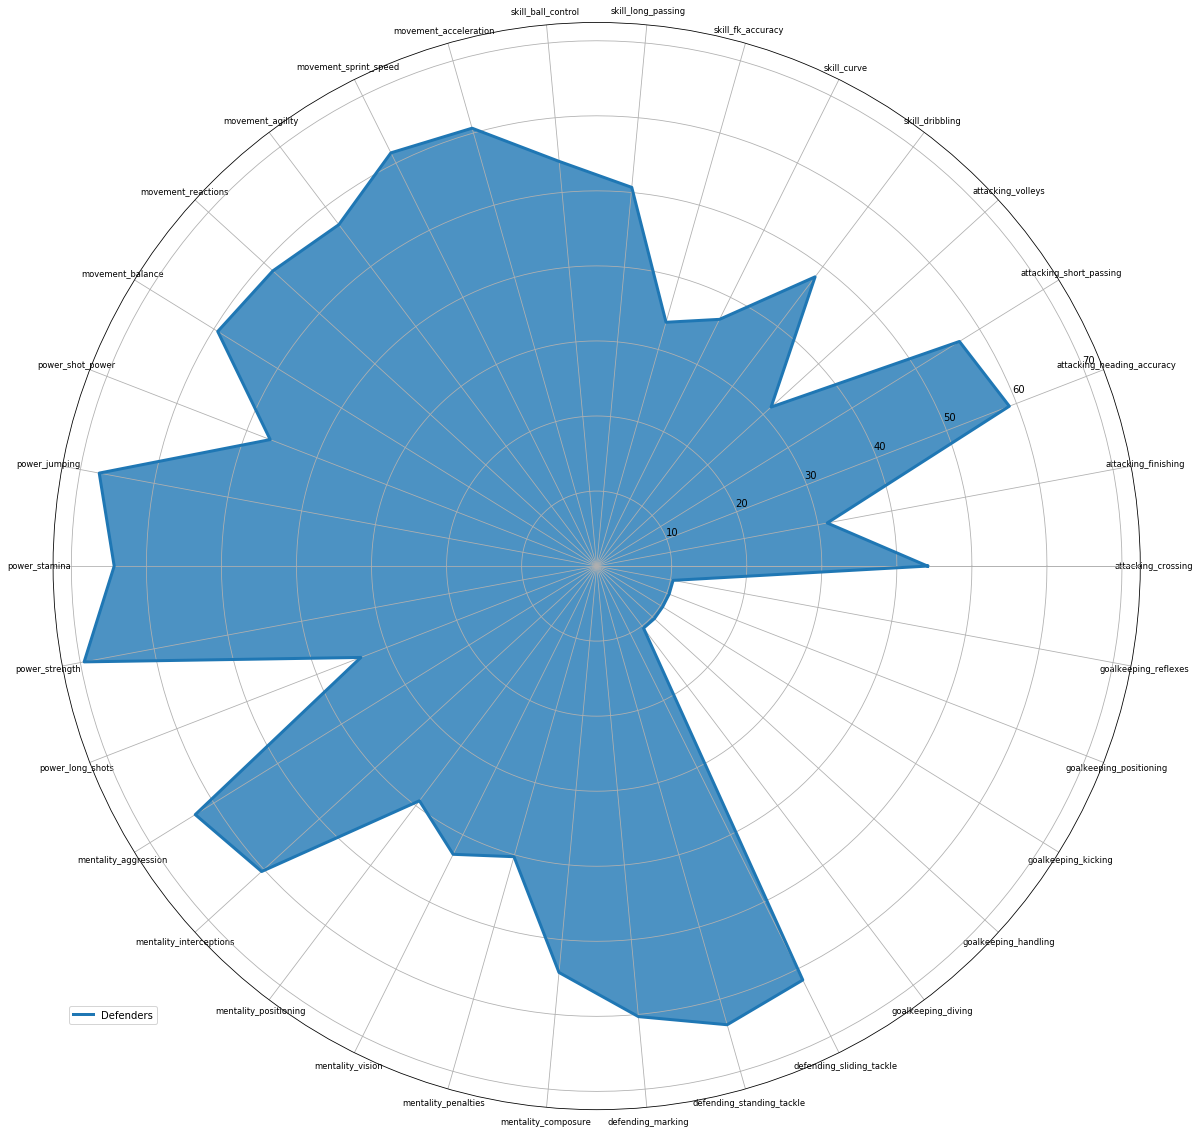

In [8]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles0, stats0, linewidth=3, label="Defenders" )
ax.fill(angles0, stats0, alpha=0.8)


plt.legend(bbox_to_anchor=(0.1, 0.1))

ax.set_thetagrids(angles0 * 180/np.pi, labels, size='small')

ax.grid(True)

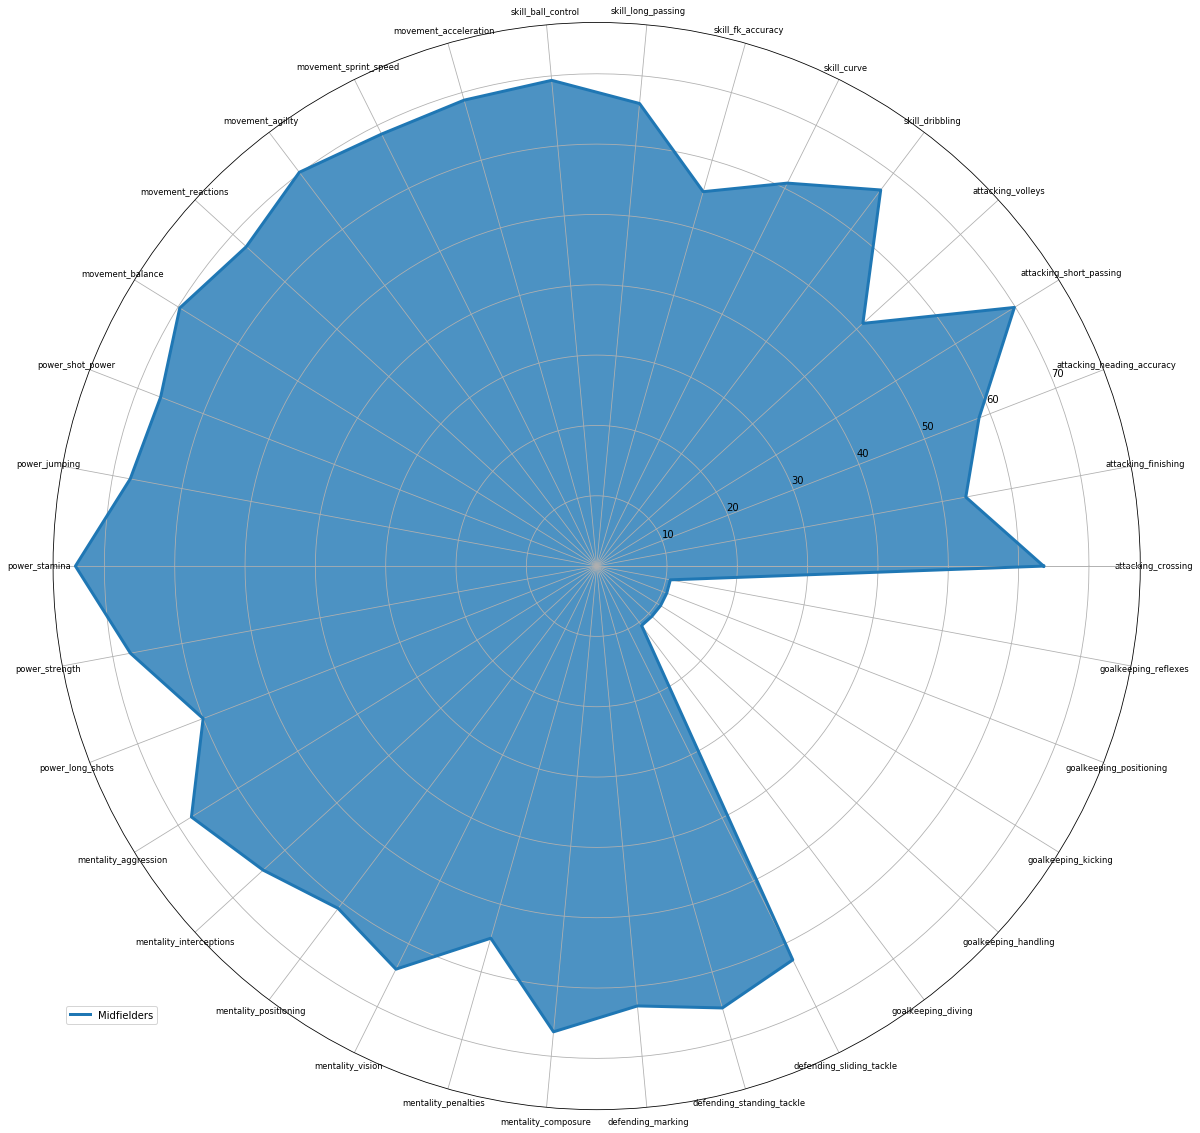

In [9]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles1, stats1, linewidth=3, label="Midfielders")
ax.fill(angles1, stats1, alpha=0.8)


plt.legend(bbox_to_anchor=(0.1, 0.1))

ax.set_thetagrids(angles0 * 180/np.pi, labels, size='small')

ax.grid(True)


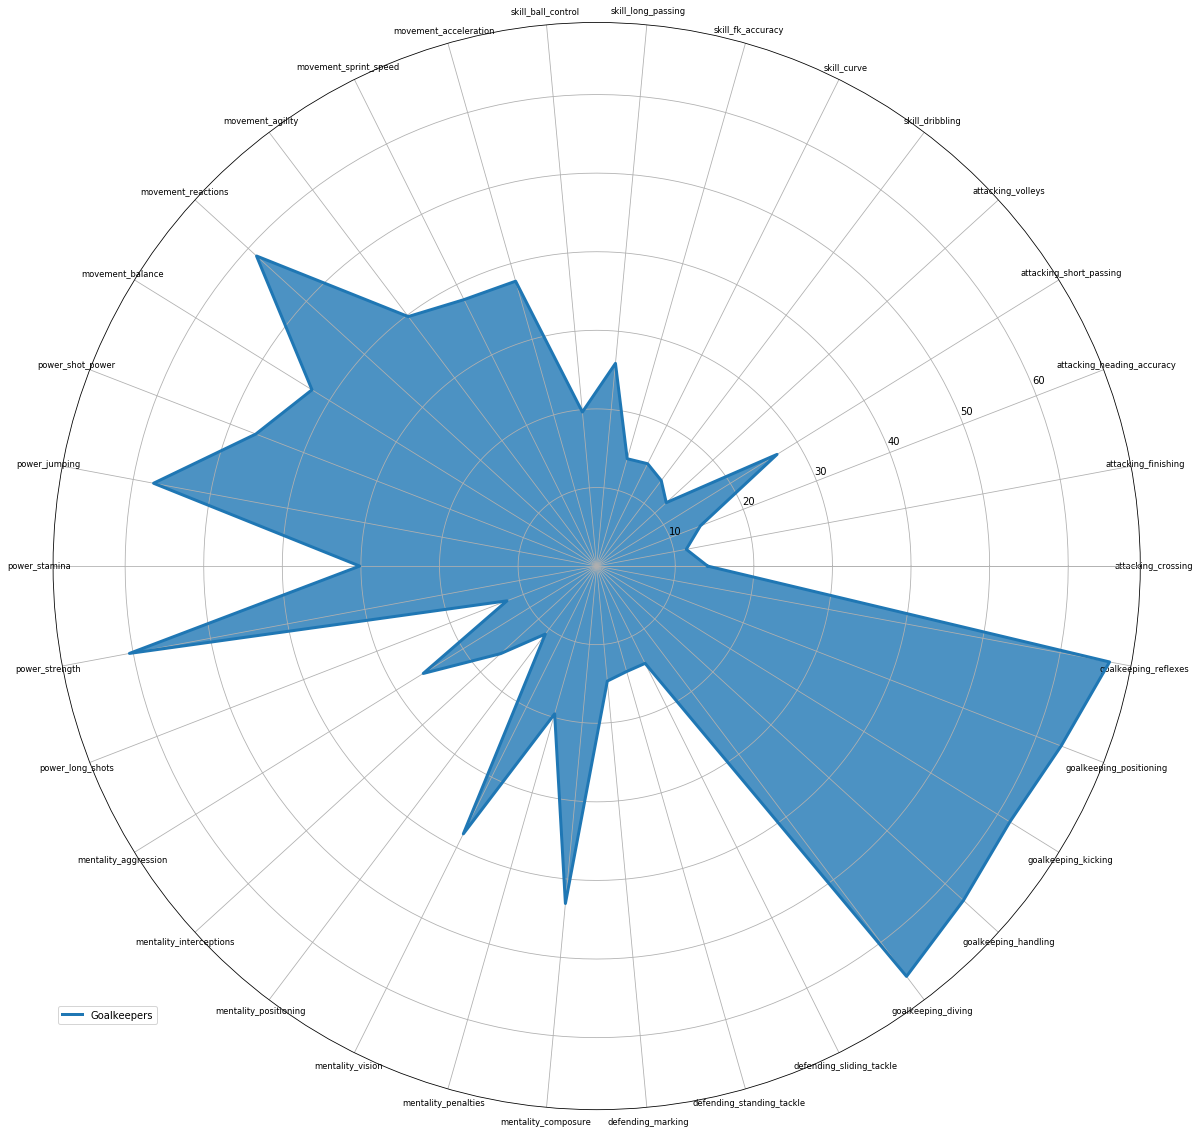

In [10]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles2, stats2, linewidth=3, label="Goalkeepers")
ax.fill(angles2, stats2, alpha=0.8)


plt.legend(bbox_to_anchor=(0.1, 0.1))

ax.set_thetagrids(angles0 * 180/np.pi, labels, size='small')

ax.grid(True)


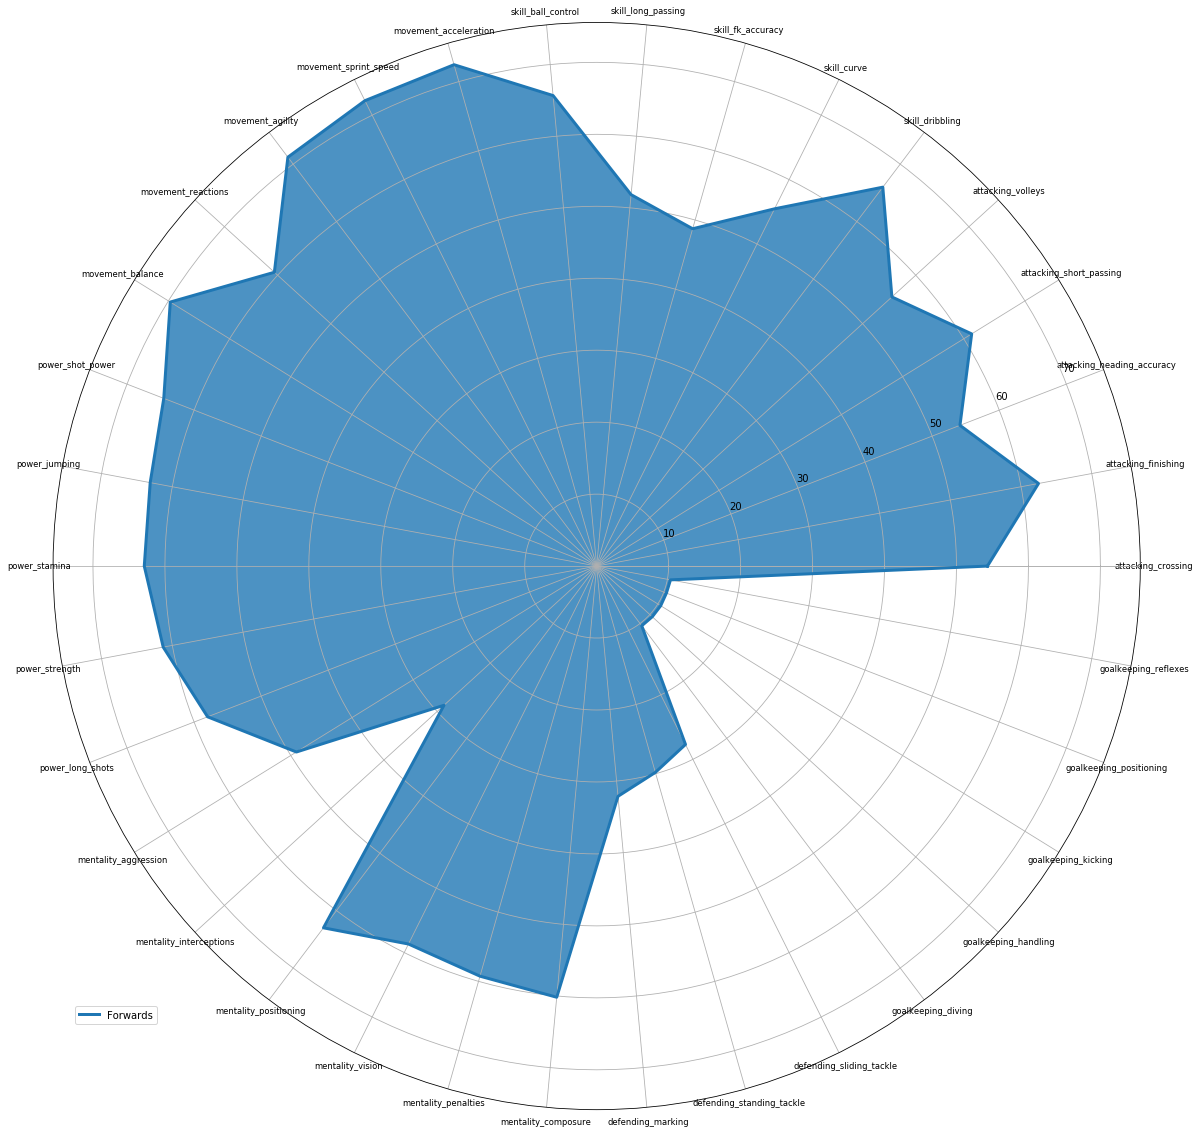

In [11]:
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles3, stats3, linewidth=3, label="Forwards")
ax.fill(angles3, stats3, alpha=0.8)


plt.legend(bbox_to_anchor=(0.1, 0.1))

ax.set_thetagrids(angles0 * 180/np.pi, labels, size='small')

ax.grid(True)

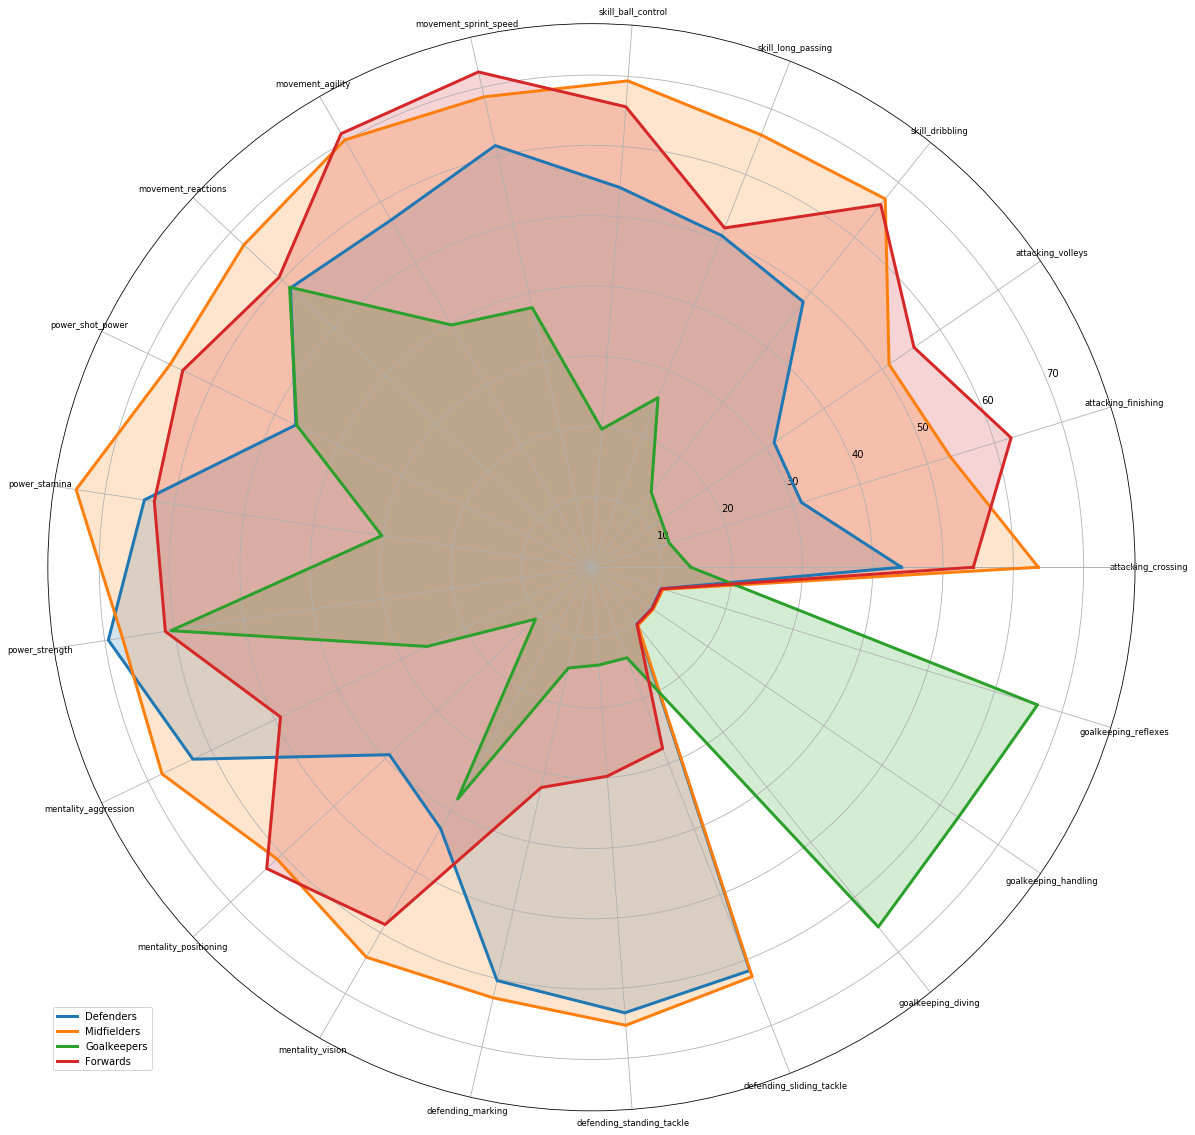

In [12]:
# Trying with less variables for clearer visualization

labels = ['attacking_crossing', 'attacking_finishing', 'attacking_volleys', 
          'skill_dribbling', 'skill_long_passing', 'skill_ball_control', 
          'movement_sprint_speed', 'movement_agility', 'movement_reactions',
          'power_shot_power','power_stamina', 'power_strength', 
          'mentality_aggression', 'mentality_positioning', 'mentality_vision',  
          'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 
          'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_reflexes']

#Values and angles
stats0=radar_df.loc[0,labels].values
angles0=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats1=radar_df.loc[1,labels].values
angles1=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats2=radar_df.loc[2,labels].values
angles2=np.linspace(0, 2*np.pi, len(labels), endpoint=False)

stats3=radar_df.loc[3,labels].values
angles3=np.linspace(0, 2*np.pi, len(labels), endpoint=False)


# close the plot
stats0=np.concatenate((stats0,[stats0[0]]))
angles0=np.concatenate((angles0,[angles0[0]]))

stats1=np.concatenate((stats1,[stats1[0]]))
angles1=np.concatenate((angles1,[angles1[0]]))

stats2=np.concatenate((stats2,[stats2[0]]))
angles2=np.concatenate((angles2,[angles2[0]]))

stats3=np.concatenate((stats3,[stats3[0]]))
angles3=np.concatenate((angles3,[angles3[0]]))



#Plot matrix
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, polar=True)

ax.plot(angles0, stats0, linewidth=3, label="Defenders")
ax.fill(angles0, stats0, alpha=0.2)

ax.plot(angles1, stats1, linewidth=3, label="Midfielders")
ax.fill(angles1, stats1, alpha=0.2)

ax.plot(angles2, stats2, linewidth=3, label="Goalkeepers")
ax.fill(angles2, stats2, alpha=0.2)

ax.plot(angles3, stats3, linewidth=3, label="Forwards")
ax.fill(angles3, stats3, alpha=0.2)


plt.legend(bbox_to_anchor=(0.1, 0.1))

ax.set_thetagrids(angles0 * 180/np.pi, labels, size='small')

ax.grid(True)


## Comparing clusters with actual positions

In [13]:
df_positions = df[['long_name', 'team_position', 'player_positions', 'cluster', 'cluster_name']]
df_positions.head(10)

long_name team_position player_positions  \
0       Lionel Andrés Messi Cuccittini            RW       RW, CF, ST   
1  Cristiano Ronaldo dos Santos Aveiro            LW           ST, LW   
2        Neymar da Silva Santos Junior           CAM          LW, CAM   
3                            Jan Oblak            GK               GK   
4                          Eden Hazard            LW           LW, CF   
5                      Kevin De Bruyne           RCM          CAM, CM   
6                Marc-André ter Stegen            GK               GK   
7                      Virgil van Dijk           LCB               CB   
8                          Luka Modrić           RCM               CM   
9                 Mohamed  Salah Ghaly            RW           RW, ST   

   cluster cluster_name  
0        3      Forward  
1        3      Forward  
2        3      Forward  
3        2   Goalkeeper  
4        3      Forward  
5        1   Midfielder  
6        2   Goalkeeper  
7        1   Midfielder  
8        1   Midfielder  
9        1   Midfielder

In [14]:
def extract_first_pos(x):
    return x.split(',', 1)[0]

df_positions['preferred_position'] = df_positions['player_positions'].apply(extract_first_pos)

df_positions.head()

long_name team_position player_positions  \
0       Lionel Andrés Messi Cuccittini            RW       RW, CF, ST   
1  Cristiano Ronaldo dos Santos Aveiro            LW           ST, LW   
2        Neymar da Silva Santos Junior           CAM          LW, CAM   
3                            Jan Oblak            GK               GK   
4                          Eden Hazard            LW           LW, CF   

   cluster cluster_name preferred_position  
0        3      Forward                 RW  
1        3      Forward                 ST  
2        3      Forward                 LW  
3        2   Goalkeeper                 GK  
4        3      Forward                 LW

In [15]:
LD = ['LB', 'LWB']
CD = ['CB']
RD = ['RB']
LM = ['LM', 'RWB']
CM = ['CM', 'CAM', 'CDM']
RM = ['RM']
LF = ['LW']
CF = ['ST', 'CF']
RF = ['RW']
GK = ['GK']

def positions(x):
    if x in LD:
        return 'LD'
    elif x in CD:
        return 'CD'
    elif x in RD:
        return 'RD'
    elif x in LM:
        return 'LM'
    elif x in CM:
        return 'CM'
    elif x in RM:
        return 'RM'
    elif x in LF:
        return 'LF'
    elif x in CF:
        return 'CF'
    elif x in RF:
        return 'RF'
    else:
        return 'GK'
    
df_positions['preferred_position'] = df_positions['preferred_position'].apply(positions)
df_positions['preferred_position'].unique()

array(['RF', 'CF', 'LF', 'GK', 'CM', 'CD', 'LD', 'RD', 'RM', 'LM'],
      dtype=object)

In [16]:
for i in range(4):
    print('Cluster {}:\n------------\n'.format(i), df_positions.loc[df_positions['cluster']==i]['preferred_position'].value_counts())

Cluster 0:
------------
 CD    2757
CM     904
LD     627
RD     622
LM      56
RM      32
CF       9
RF       6
LF       3
Name: preferred_position, dtype: int64
Cluster 1:
------------
 CM    2816
LD     763
RD     689
CD     405
LM     243
RM     232
CF      99
RF      39
LF      36
Name: preferred_position, dtype: int64
Cluster 2:
------------
 GK    2036
Name: preferred_position, dtype: int64
Cluster 3:
------------
 CF    2587
CM    1043
LM     819
RM     786
LF     339
RF     324
RD       3
LD       3
Name: preferred_position, dtype: int64


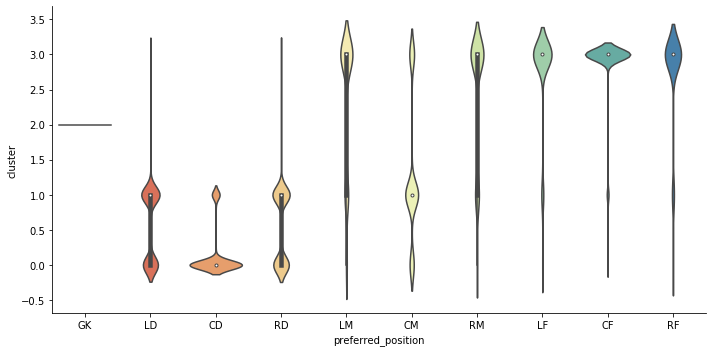

In [17]:
sns.catplot(data=df_positions, y='cluster', x='preferred_position', aspect=2, kind='violin', 
            order=['GK', 'LD', 'CD', 'RD', 'LM', 'CM', 'RM', 'LF', 'CF', 'RF'], palette='Spectral')
plt.show()

## Looking for young players with higher potential for each cluster

In [18]:
# Separating clusters in DFs

df_gk = df.loc[df['cluster']==2]
df_def = df.loc[df['cluster']==0]
df_mid = df.loc[df['cluster']==1]
df_fw = df.loc[df['cluster']==3]

In [19]:
# Filtering players younger than 22

df_young = df.loc[df['age']<22]

df_gk_young = df_gk.loc[df_gk['age']<22]
df_def_young = df_def.loc[df_def['age']<22]
df_mid_young = df_mid.loc[df_mid['age']<22]
df_fw_young = df_fw.loc[df_fw['age']<22]

In [28]:
#Plotting young players

df_young.iplot(x='overall', y='potential', categories='cluster_name', 
           yTitle='Potential', xTitle='Current Overall',
           title='Young Players Potential', text='short_name',
           mode='markers')

In [29]:
#Plotting young goalkeepers

df_gk_young.iplot(x='overall', y='potential', categories='cluster_name',  
           yTitle='Potential', xTitle='Current Overall',
           title='Young Goalkeepers Potential', text='short_name',
          filename='graphs/young_gks_potential', mode='markers+text')

In [30]:
#Plotting young defenders

df_def_young.iplot(x='overall', y='potential', categories='cluster_name',  
           yTitle='Potential', xTitle='Current Overall',
           title='Young Defenders Potential', text='short_name',
          filename='graphs/young_defs_potential', mode='markers+text')

In [31]:
#Plotting young midfielders

df_mid_young.iplot(x='overall', y='potential', categories='cluster_name',  
           yTitle='Potential', xTitle='Current Overall',
           title='Young Midfielders Potential', text='short_name',
          filename='graphs/young_mid_potential', mode='markers+text')

In [32]:
#Plotting young forwards

df_fw_young.iplot(x='overall', y='potential', categories='cluster_name',  
           yTitle='Potential', xTitle='Current Overall',
           title='Young Forwards Potential', text='short_name',
          filename='graphs/young_fw_potential', mode='markers+text')

In [33]:
df_def_young.iplot(x='value_eur', y='potential', categories='cluster_name',  
           yTitle='Potential', xTitle='Value',
           title='Young Defenders Value', text='short_name',
           mode='markers+text')